# Overview

In [1]:
import pandas as pd

# load csv file
air1 = pd.read_csv("data/airline1.csv")
air2 = pd.read_csv("data/airline2.csv")

# merge dataframes
og_data = pd.concat([air1, air2])

# save to csv
og_data.to_csv("data/airline_merged.csv")


In [3]:
# drop first column (unnamed)
og_data = og_data.drop(columns=["Unnamed: 0"])

# apply .title to each column name
og_data.columns = og_data.columns.str.title()

# drop ID column
og_data = og_data.drop(columns=["Id"])

og_data


,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,...,Inflight Entertainment,On-Board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,satisfied


In [4]:
og_data["Type Of Travel"] = og_data["Type Of Travel"].replace(
    {"Business travel": "Business Travel"}
)
og_data["Customer Type"] = og_data["Customer Type"].replace(
    {"disloyal Customer": "Disloyal Customer"}
)
og_data["Satisfaction"] = og_data["Satisfaction"].replace(
    {"neutral or dissatisfied": "Neutral or Dissatisfied", "satisfied": "Satisfied"}
)
og_data


,Gender,Customer Type,Age,Type Of Travel,Class,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,...,Inflight Entertainment,On-Board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes,Satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,Neutral or Dissatisfied
1,Male,Disloyal Customer,25,Business Travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,Neutral or Dissatisfied
2,Female,Loyal Customer,26,Business Travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,Satisfied
3,Female,Loyal Customer,25,Business Travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,Neutral or Dissatisfied
4,Male,Loyal Customer,61,Business Travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,Satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,Disloyal Customer,34,Business Travel,Business,526,3,3,3,1,...,4,3,2,4,4,5,4,0,0.0,Neutral or Dissatisfied
25972,Male,Loyal Customer,23,Business Travel,Business,646,4,4,4,4,...,4,4,5,5,5,5,4,0,0.0,Satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,...,2,4,3,4,5,4,2,0,0.0,Neutral or Dissatisfied
25974,Male,Loyal Customer,14,Business Travel,Business,1127,3,3,3,3,...,4,3,2,5,4,5,4,0,0.0,Satisfied


In [5]:
# save changes to new csv file
og_data.to_csv("data/airline_merged_clean.csv", index=False)


In [6]:
# show nan values
og_data.isnull().sum()


Gender                                 0
Customer Type                          0
Age                                    0
Type Of Travel                         0
Class                                  0
Flight Distance                        0
Inflight Wifi Service                  0
Departure/Arrival Time Convenient      0
Ease Of Online Booking                 0
Gate Location                          0
Food And Drink                         0
Online Boarding                        0
Seat Comfort                           0
Inflight Entertainment                 0
On-Board Service                       0
Leg Room Service                       0
Baggage Handling                       0
Checkin Service                        0
Inflight Service                       0
Cleanliness                            0
Departure Delay In Minutes             0
Arrival Delay In Minutes             393
Satisfaction                           0
dtype: int64

In [7]:
# show number of unique values per col
og_data.nunique()


Gender                                  2
Customer Type                           2
Age                                    75
Type Of Travel                          2
Class                                   3
Flight Distance                      3821
Inflight Wifi Service                   6
Departure/Arrival Time Convenient       6
Ease Of Online Booking                  6
Gate Location                           6
Food And Drink                          6
Online Boarding                         6
Seat Comfort                            6
Inflight Entertainment                  6
On-Board Service                        6
Leg Room Service                        6
Baggage Handling                        5
Checkin Service                         6
Inflight Service                        6
Cleanliness                             6
Departure Delay In Minutes            466
Arrival Delay In Minutes              472
Satisfaction                            2
dtype: int64

# Analysis

In [8]:
from helper_functions import extended_describe

data = og_data.copy()


In [9]:
# save extended describe to csv
extended_describe(data).to_csv("data/eda/extended_describe.csv")
extended_describe(data)

,Age,Flight Distance,Inflight Wifi Service,Departure/Arrival Time Convenient,Ease Of Online Booking,Gate Location,Food And Drink,Online Boarding,Seat Comfort,Inflight Entertainment,On-Board Service,Leg Room Service,Baggage Handling,Checkin Service,Inflight Service,Cleanliness,Departure Delay In Minutes,Arrival Delay In Minutes
Total de valores,"129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,880","129,487"
Media,39.43,"1,190.32",2.73,3.06,2.76,2.98,3.20,3.25,3.44,3.36,3.38,3.35,3.63,3.31,3.64,3.29,14.71,15.09
Desviación estándar,15.12,997.45,1.33,1.53,1.40,1.28,1.33,1.35,1.32,1.33,1.29,1.32,1.18,1.27,1.18,1.31,38.07,38.47
Mínimo,7,31,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Q1,27,414,2,2,2,2,2,2,2,2,2,2,3,3,3,2,0,0
Q2,40,844,3,3,3,3,3,3,4,4,4,4,4,3,4,3,0,0
Q3,51,"1,744",4,4,4,4,4,4,5,4,4,4,5,4,5,4,12,13
Máximo,85,"4,983",5,5,5,5,5,5,5,5,5,5,5,5,5,5,"1,592","1,584"
RIC,24,"1,330",2,2,2,2,2,2,3,2,2,2,2,1,2,2,12,13
Asimetría,-0.00,1.11,0.04,-0.33,-0.02,-0.06,-0.16,-0.46,-0.49,-0.37,-0.42,-0.35,-0.68,-0.37,-0.69,-0.30,6.82,6.67


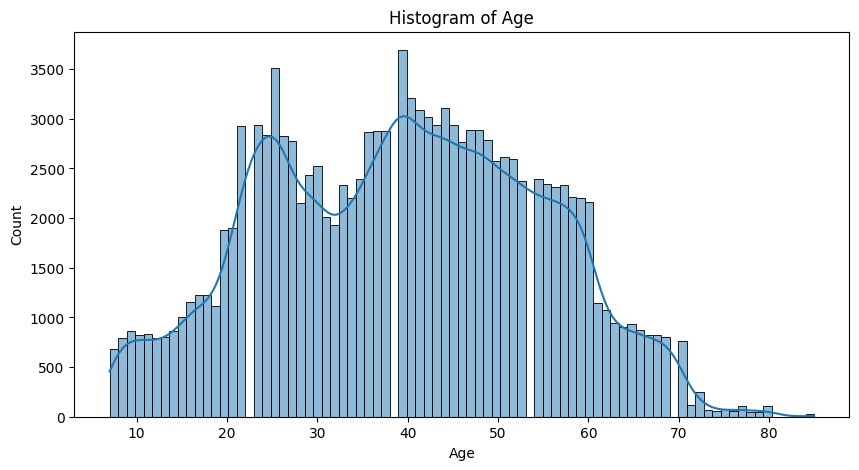

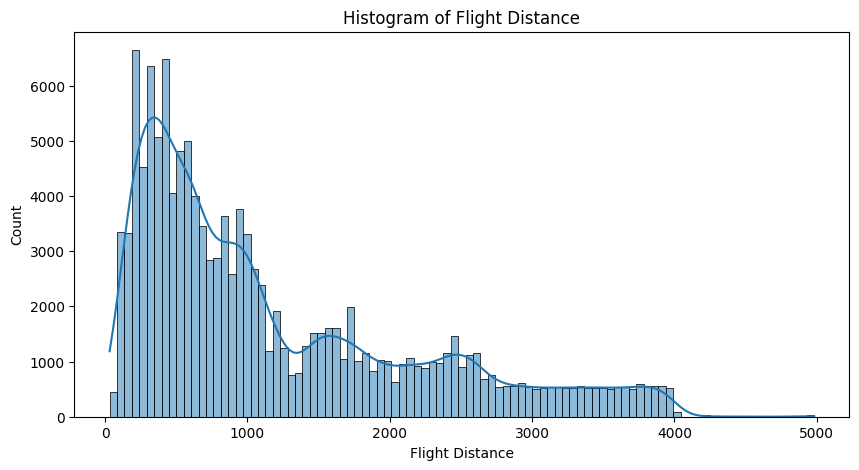

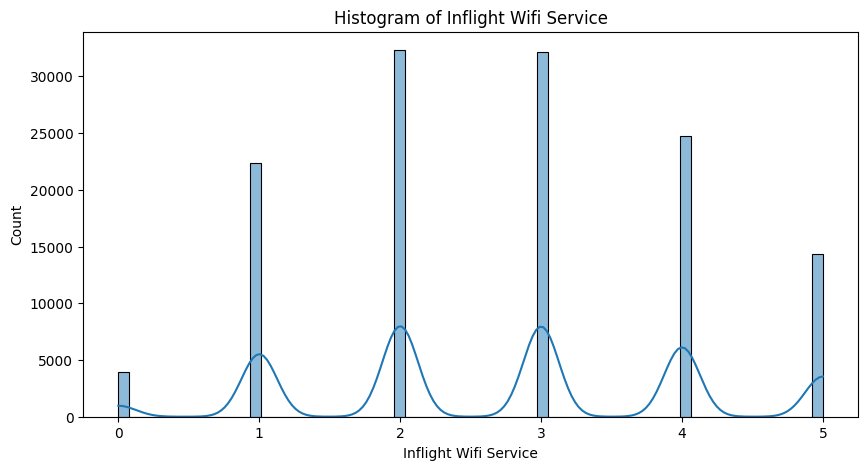

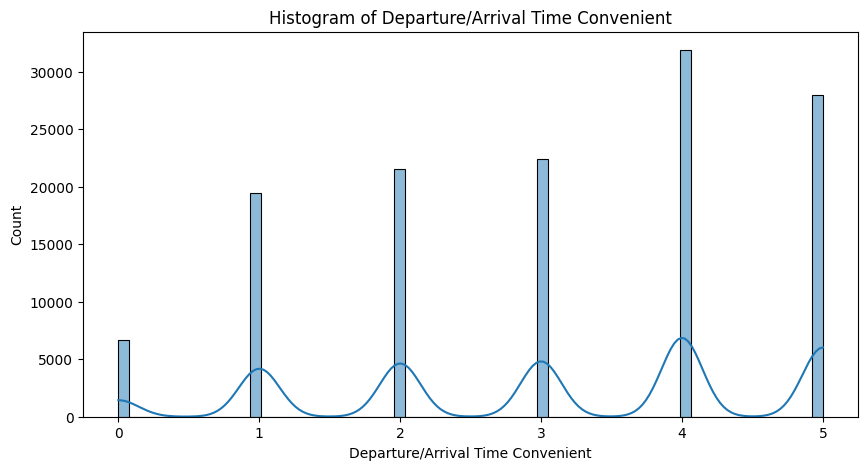

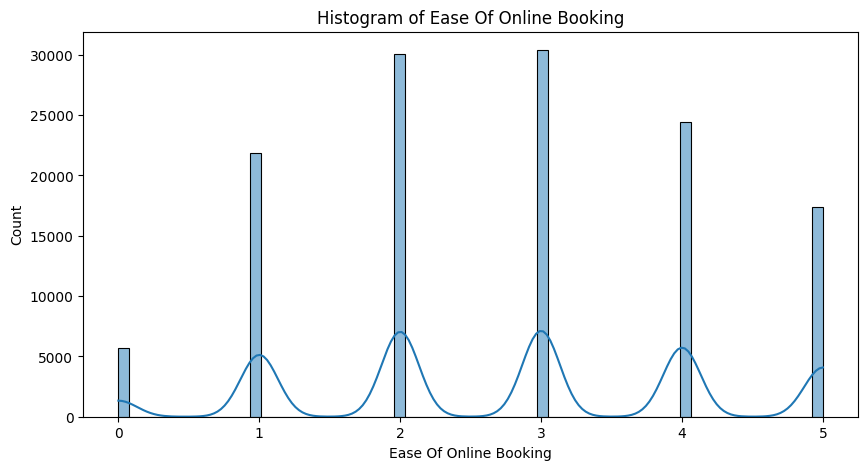

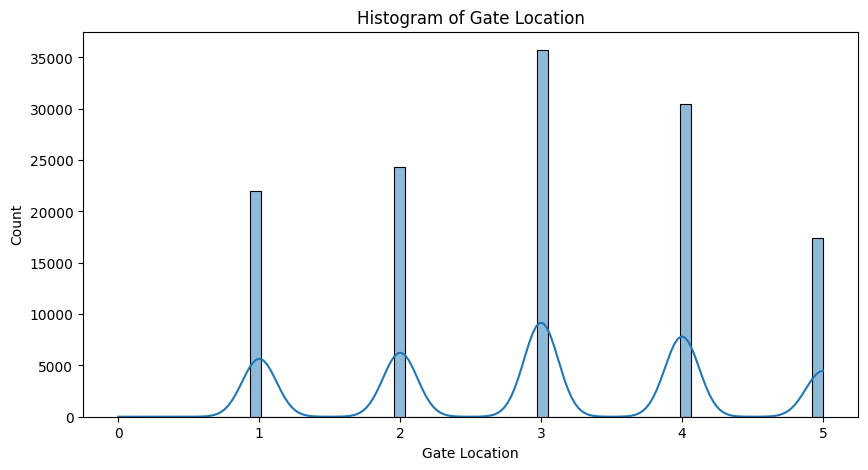

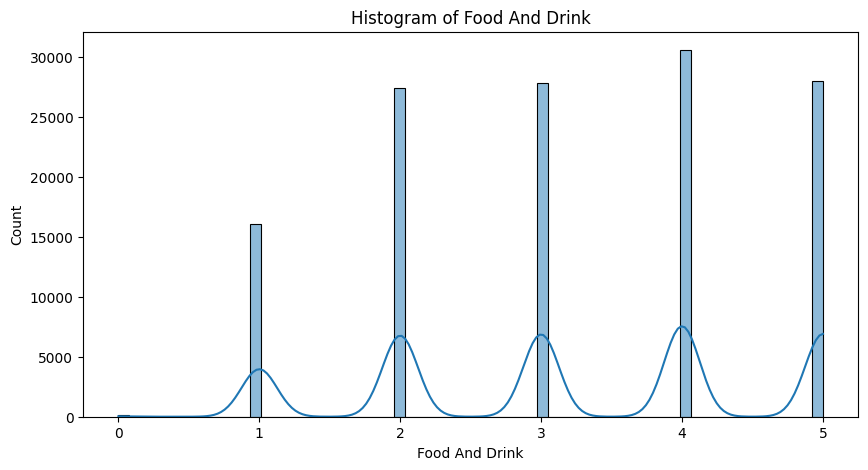

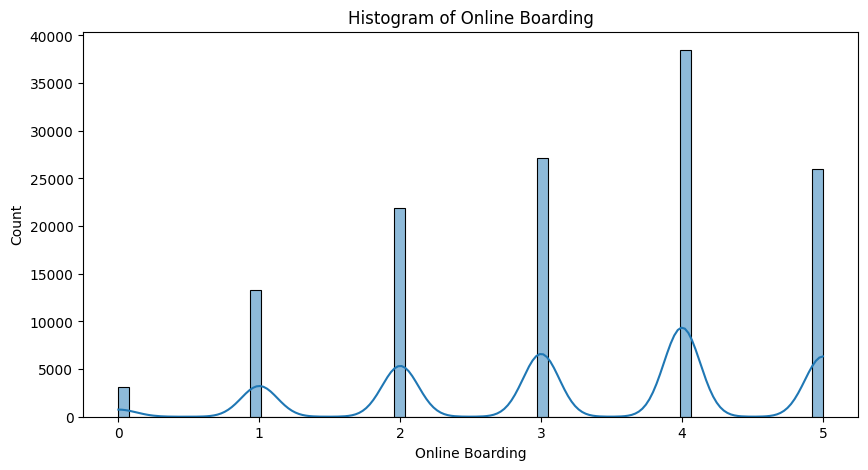

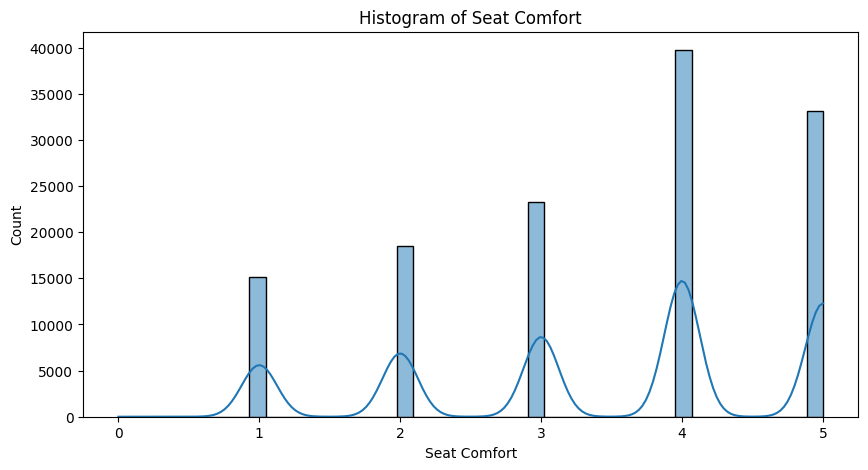

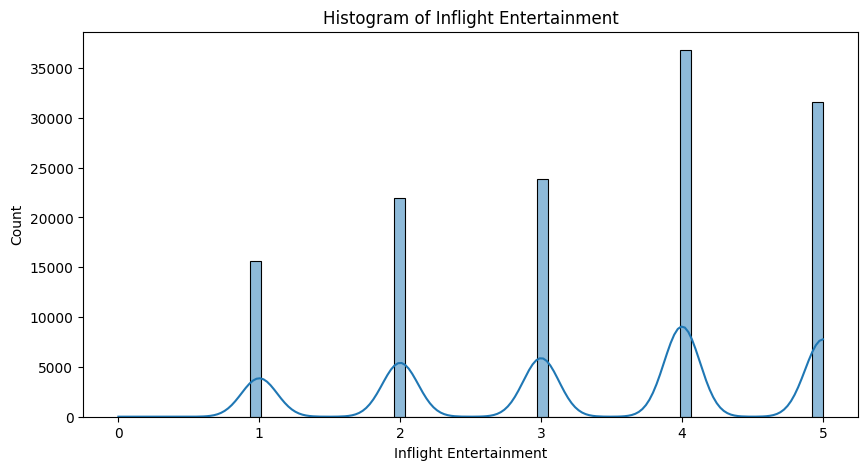

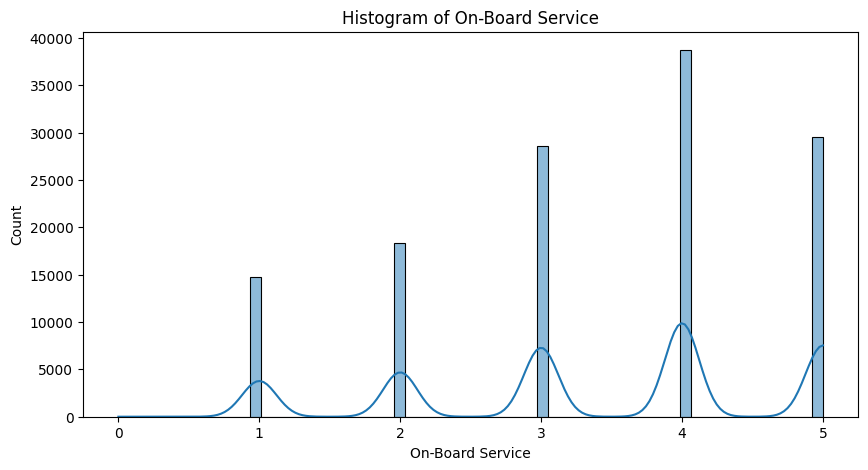

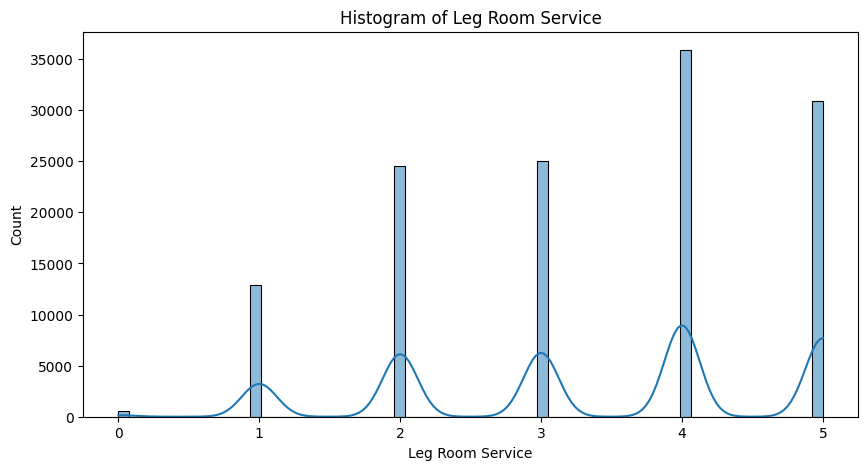

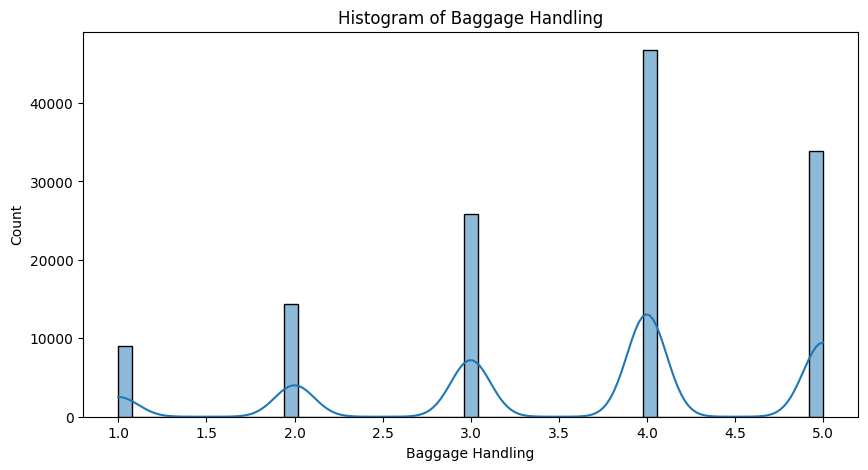

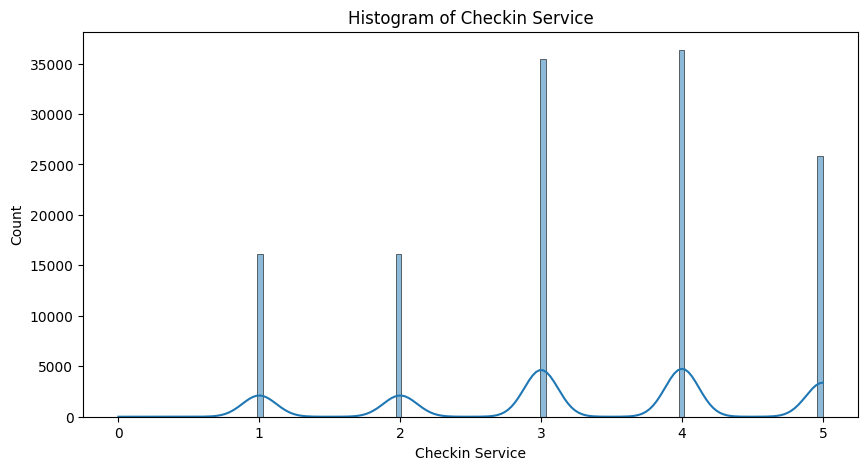

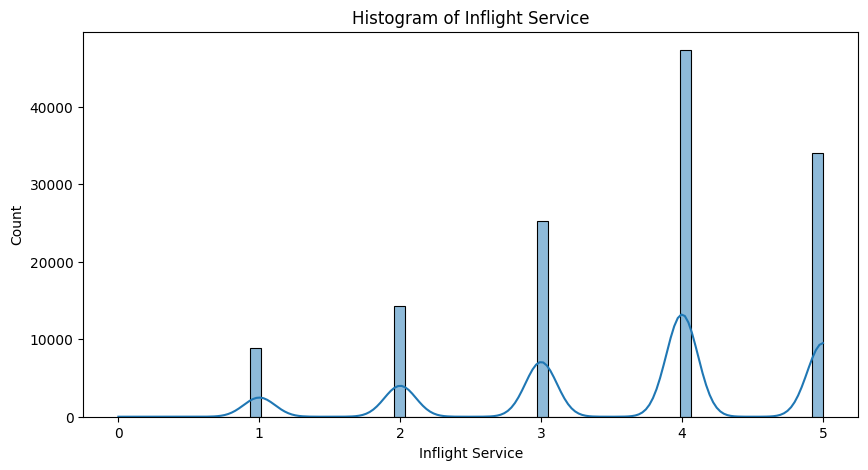

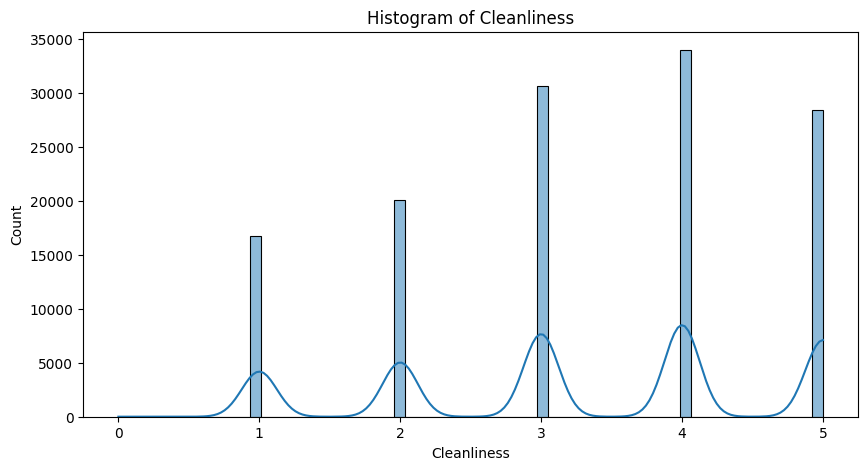

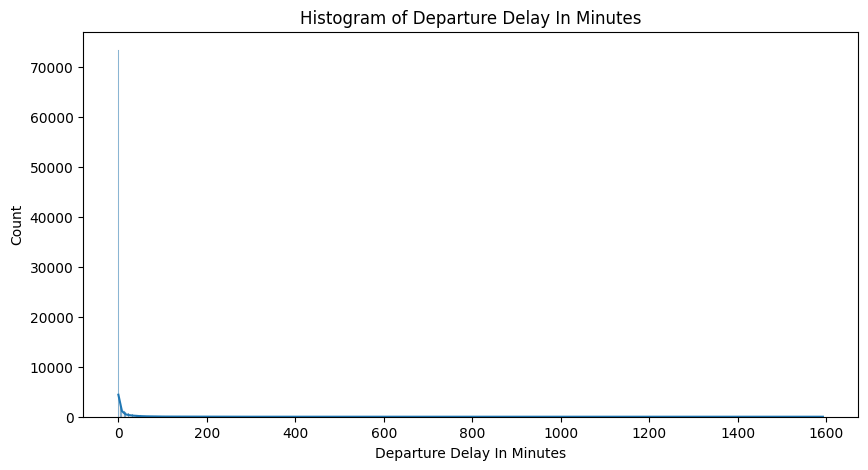

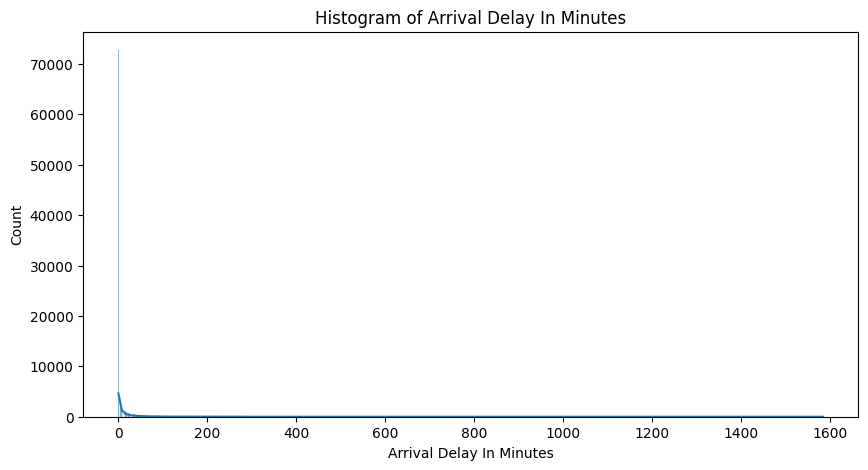

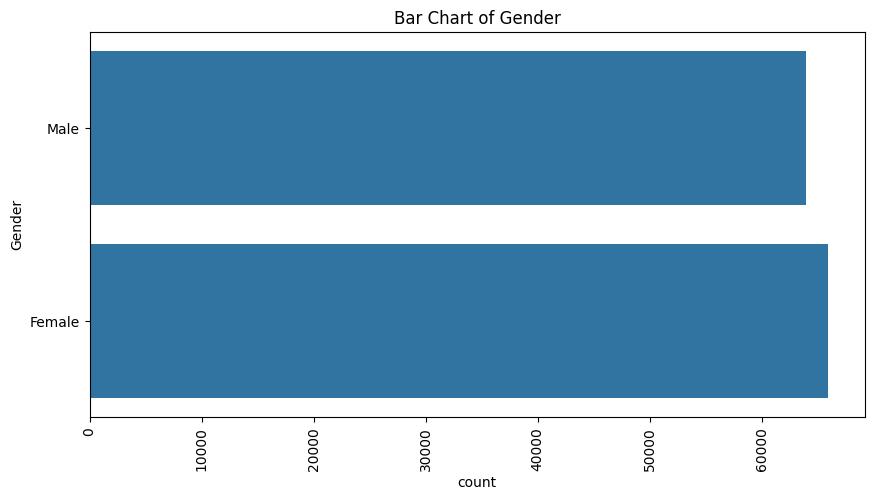

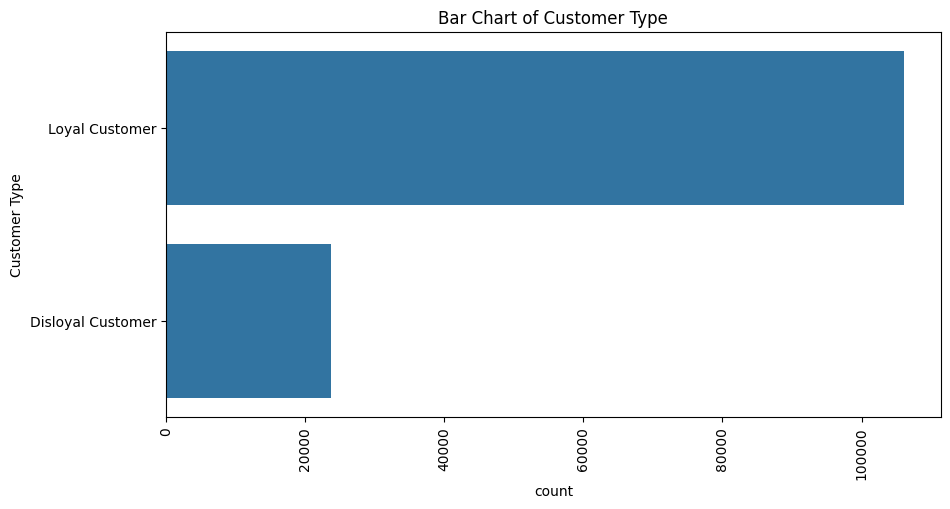

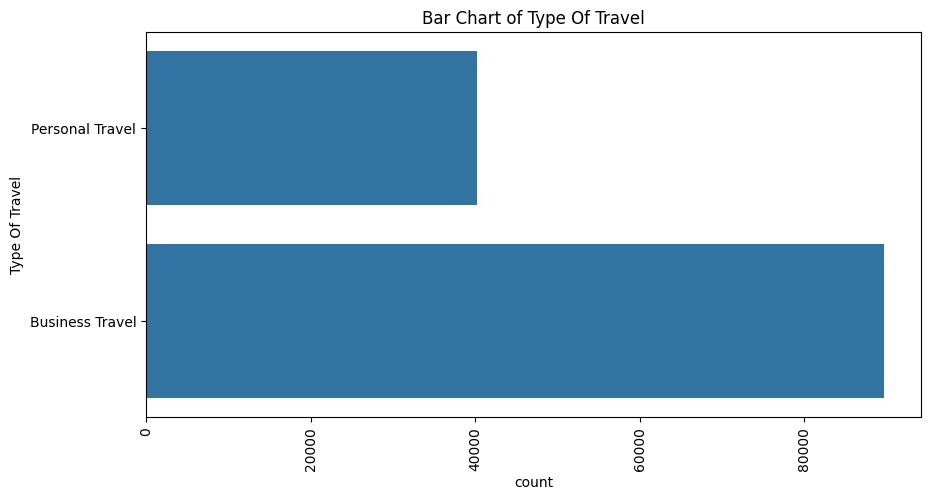

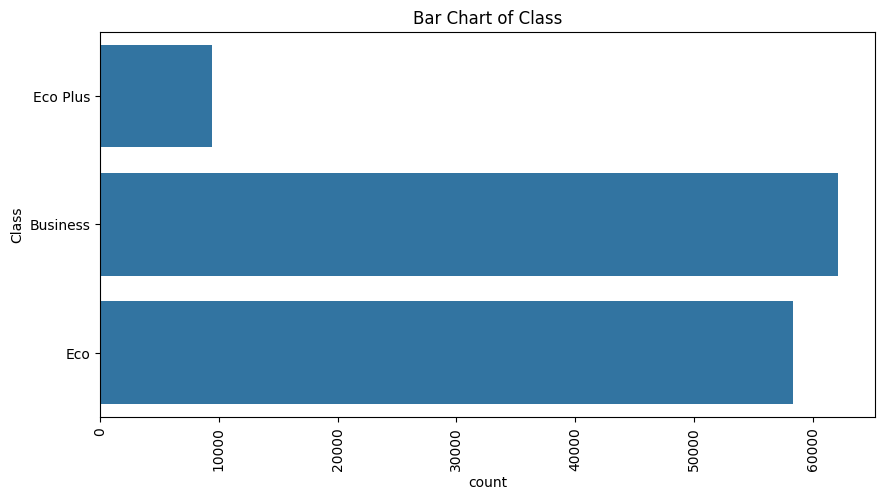

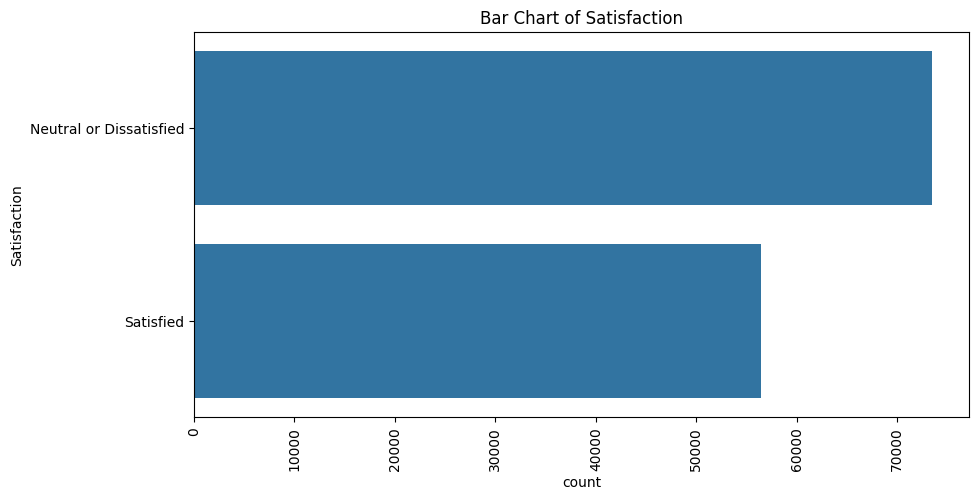

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get numeric and categorical columns
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=["object"]).columns

# Plot histograms for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

# Plot bar charts for categorical columns
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    sns.countplot(data[col])
    plt.title(f"Bar Chart of {col}")
    plt.xticks(rotation=90)
    plt.show()
